# Zpracování dat

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [7]:
data = pd.read_csv('data/output.csv', sep=",")

In [8]:
data

,name,role,bet,check,winner value,loser value
0,A,D,5,1,17,22
1,B,D,5,1,18,26
2,A,D,5,1,17,26
3,B,D,5,1,21,21
4,A,D,5,1,17,22
5,A,B,5,1,21,18
6,A,D,5,1,18,23
7,B,D,5,1,17,23
8,A,D,5,1,18,23
9,B,D,5,1,17,24


In [13]:
names = tuple(set(data["name"].values))
names

('A', 'B')

In [19]:
counts = []
for name in names:
    count = list(data["name"].values).count(name)
    counts.append(count)
    print(name, count)

A 49
B 51


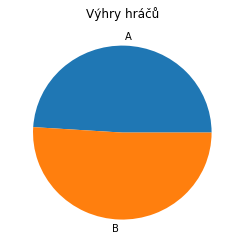

In [23]:
plt.figure(figsize=(4,4))
plt.pie(counts, labels=names)
plt.title("Výhry hráčů")
plt.show()

/home/matous/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


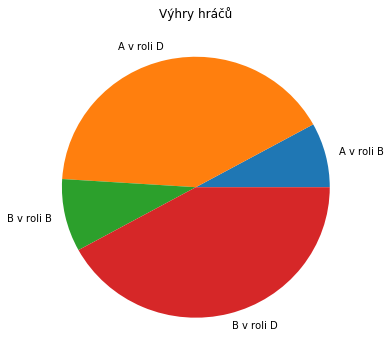

In [46]:
roles = ["B", "D"]

labels = []
counts = []
for name in names:
    for role in roles:
        labels.append("{} v roli {}".format(name, role))
        count = len(data[data["name"] == name][data["role"] == role])
        counts.append(count)
    
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels)
plt.title("Výhry hráčů")
plt.show()